In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

(808L, 766L, 3L)

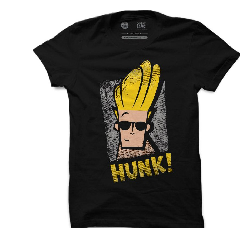

In [3]:
plt.figure()
plt.axis("off")
plt.imshow(image)

In [4]:
image.shape

(808L, 766L, 3L)

In [5]:
image = image.reshape((image.shape[0] * image.shape[1], 3))
print image
print image.shape

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ..., 
 [255 255 255]
 [255 255 255]
 [255 255 255]]
(618928L, 3L)


In [6]:
from sklearn.cluster import KMeans
K = 3
clf = KMeans(n_clusters=K)
clf.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
#initialising the label dictionary
label = [0, 0, 0]

#finding count of data in each cluster
for x in clf.labels_:
    label[x] += 1

#Total Number of data points
label_sum = image.shape[0]

#converting to percentage
label = [float(x) / label_sum for x in label]
print label

[0.5926585967996277, 0.3133773233720239, 0.09396407982834837]


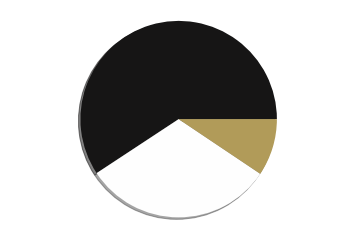

In [8]:
import webcolors

centroids = [x.astype("uint8").tolist() for x in clf.cluster_centers_]

clr = [webcolors.rgb_to_hex(c) for c in centroids]

plt.pie(label, colors=clr, shadow=True) 
plt.axis('equal')
plt.show()

In [9]:
import glob
%matplotlib inline
import seaborn as sns
sns.set()
images = [cv2.imread(file) for file in glob.glob("Dominant Color Data Set/*.jpg")]

In [10]:
colorTriple = []
color = []
label = []
k=3
for i in range(0,10):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    images[i] = images[i].reshape((images[i].shape[0] * images[i].shape[1], 3))  
    clf = KMeans(n_clusters = k, n_jobs=4)
    clf.fit(images[i])
    labels = clf.labels_
    label.append([0] * k)
    for x in labels: label[i][x] += 1
    label[i] = [float(x)/ sum(label[i]) * 100 for x in label[i]]
    color.append(clf.cluster_centers_)
    color[i] = [[int(j) for j in x] for x in color[i]]
    colorTriple.append(color[i])
    color[i] = [webcolors.rgb_to_hex(x) for x in color[i]]

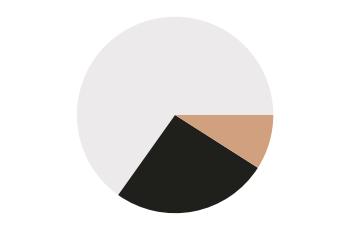

In [11]:
plt.pie(label[7], colors = color[7])
plt.axis('equal')
plt.show()

In [12]:
color

[[u'#d9d4d1', u'#30325b', u'#a6595c'],
 [u'#471215', u'#852e34', u'#9a9192'],
 [u'#2f2f22', u'#d6cbc7', u'#6e614c'],
 [u'#fbfaf8', u'#5c4c47', u'#d8b59c'],
 [u'#6b484e', u'#8c8688', u'#261b20'],
 [u'#c1a093', u'#fbfbfa', u'#322b2c'],
 [u'#f0efee', u'#12162d', u'#c18f78'],
 [u'#edeaeb', u'#1f1f1b', u'#d0a07f'],
 [u'#282731', u'#c9bdc1', u'#74737a'],
 [u'#f0f0f0', u'#2c2d40', u'#c4afaa']]

In [13]:
webcolors.hex_to_name(u'#daa520')

u'goldenrod'

In [14]:
colortrip = [j for i in colorTriple for j in i]
colortrip

[[217, 212, 209],
 [48, 50, 91],
 [166, 89, 92],
 [71, 18, 21],
 [133, 46, 52],
 [154, 145, 146],
 [47, 47, 34],
 [214, 203, 199],
 [110, 97, 76],
 [251, 250, 248],
 [92, 76, 71],
 [216, 181, 156],
 [107, 72, 78],
 [140, 134, 136],
 [38, 27, 32],
 [193, 160, 147],
 [251, 251, 250],
 [50, 43, 44],
 [240, 239, 238],
 [18, 22, 45],
 [193, 143, 120],
 [237, 234, 235],
 [31, 31, 27],
 [208, 160, 127],
 [40, 39, 49],
 [201, 189, 193],
 [116, 115, 122],
 [240, 240, 240],
 [44, 45, 64],
 [196, 175, 170]]

In [15]:
label = [j for i in label for j in i]
label

[29.582356770833336,
 47.1875,
 23.230143229166668,
 29.602864583333332,
 48.77571614583333,
 21.621419270833332,
 56.894856770833336,
 27.591145833333336,
 15.513997395833334,
 67.9765625,
 15.201497395833332,
 16.821940104166664,
 14.945638020833332,
 63.12434895833333,
 21.930013020833332,
 9.6064453125,
 59.26692708333333,
 31.126627604166668,
 71.48177083333334,
 23.814453125,
 4.703776041666666,
 65.16243489583333,
 25.804361979166668,
 9.033203125,
 56.88964843749999,
 14.411458333333332,
 28.698893229166668,
 32.069986979166664,
 58.611979166666664,
 9.318033854166668]

In [16]:
colors = [['Black', [0,0,0]],
 ['Blue', [0,0,255]],
 ['Brown', [165,42,42]],    
 ['Cream', [255,255,204]],   
 ['Green',  [0,128,0]],        
 ['Grey',   [128,128,128]],
 ['Yellow', [255,255,0]],
 ['Orange', [255,165,0]],          
 ['Pink', [255,192,203]], 
 ['Red', [255,0,0]],  
 ['Purple', [128,0,128]],
 ['Tan', [210,180,140]],
 ['Turquoise', [64,224,208]],
 ['White', [255,255,255]]]

import math
cols = []
for i in colortrip:
    dist = 999
    color = ''
    for j in colors:
        val = math.sqrt((j[1][0]-i[0])**2+(j[1][1]-i[1])**2+(j[1][2]-i[2])**2)
        if val < dist:
            dist = val
            color = j[0]
    cols.append(color)
cols

['Pink',
 'Purple',
 'Grey',
 'Black',
 'Brown',
 'Grey',
 'Black',
 'Pink',
 'Grey',
 'White',
 'Grey',
 'Tan',
 'Brown',
 'Grey',
 'Black',
 'Tan',
 'White',
 'Black',
 'White',
 'Black',
 'Tan',
 'White',
 'Black',
 'Tan',
 'Black',
 'Tan',
 'Grey',
 'White',
 'Black',
 'Tan']

In [17]:
color_total = {}
for i, val in enumerate(cols):
    if val not in color_total:
        color_total[val] = 0
    color_total[val] += label[i]
for i in color_total:
    color_total[i] /= 10
color_total

{'Black': 30.46748046875,
 'Brown': 6.372135416666666,
 'Grey': 16.739029947916666,
 'Pink': 5.7173502604166675,
 'Purple': 4.71875,
 'Tan': 6.389485677083333,
 'White': 29.59576822916667}

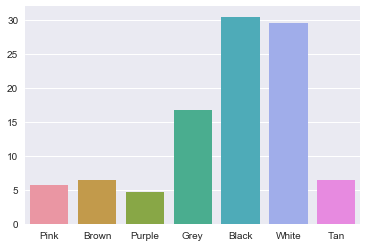

In [18]:
x = [i for i in color_total]
y = [color_total[i] for i in x]
sns.barplot(x, y)